## 1.1 - Movielens full - EDA

---



 a) Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan,
utan försök undersöka fler aspekter av datan.
---

Jag startar med att titta över datan så att jag kan visualisera det bättre med planen att skriva ut filmer ihopsatta med deras respektive genre.

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

movies_path = "../../data/ml-latest/movies.csv" # testar lite utöver med en path istället för att lägga en df direkt.

movies_df = pd.read_csv(movies_path)

print(movies_df.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


Med denna utskrift så kan jag se att den innehåller tre stycken olika kolumner "movieId", "title" och "genres", vi kan dock se att genre delas med ett | planen är då att ta ut den relevanta med att splitta från varje | som förekommer för att få fram god data. ChatGPT gav mig ett tips om att använda Counter för att räkna relevant data, hittade tyvärr inte dom relevanta kommandona för det så jag skriver det med hjälp av just GPT men i lärningssyfte att jag ska veta vad jag gör. 

In [80]:
from collections import Counter # ChatGPT gav mig ett gott tips att använda Counter här

movies_path = "../../data/ml-latest/movies.csv"
movies_df = pd.read_csv(movies_path)

#Splitta genrerna från | och skapa en lista med alla genre
genre_list = "|".join(movies_df["genres"]).split("|") 

# Räkna varje del av genrerna
genre_counts = Counter(genre_list)

# Konverterar genre_counts till df för snygg visualisering
genre_counts_df = pd.DataFrame(genre_counts.items(), columns = ["Genre", "Movies"])

# Sortera df efter antalet filmerna i descending order
genre_counts_df = genre_counts_df.sort_values(by="Movies", ascending = False).reset_index(drop=True) 

genre_counts_df

,Genre,Movies
0,Drama,33681
1,Comedy,22830
2,Thriller,11675
3,Romance,10172
4,Action,9563
5,Documentary,9283
6,Horror,8570
7,(no genres listed),7060
8,Crime,6917
9,Adventure,5349


med detta så kan vi med lätthet göra en plot på detta, använder matplotlib för denna övning.

Jag inser att den inte går efter datavisualiserings designregler, men i detta fall är det mera för att se till att allting skrivs ut rätt och stämmer.

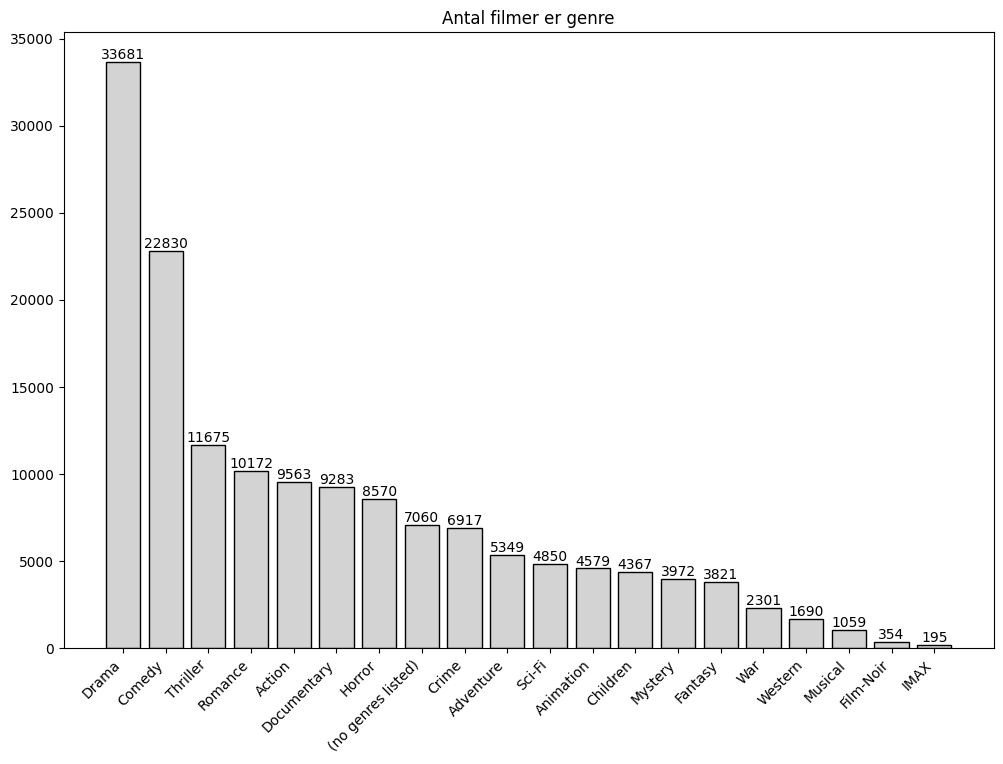

In [81]:
plt.figure(figsize=(12, 8))

plt.bar(genre_counts_df["Genre"], genre_counts_df["Movies"], color="lightgrey", edgecolor="black")

plt.title("Antal filmer er genre")

plt.xticks(rotation=45, ha="right")


#gör en uskrift av varje stapel för att dubbelkolla att siffrorna stämmer
for index, value in enumerate(genre_counts_df["Movies"]):
    plt.text(index, value, str(value), ha="center", va="bottom")

plt.show()


---

## b) Vilka är de 10 filmerna med flest ratings?

Jag startar med en ratings_df för lättare visualisering över datan jag har att jobba med.


In [82]:
ratings_path = "../../data/ml-latest/ratings.csv"

ratings_df = pd.read_csv(ratings_path)

ratings_df


,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765


In [83]:
# Gruppera ratings_df efter "movieId", räkna antalet ratings, och sortera i descending order.
c_rating = ratings_df.groupby("movieId").size().reset_index(name="count")
h_rating = c_rating.sort_values("count", ascending=False).head(10)

# Slå samman h_rating med movies_df för att få filmtitlar och genrer
h_rating_with_titles = pd.merge(h_rating, movies_df, on="movieId")

# Visa resultatet
display(h_rating_with_titles[["movieId", "title", "count"]])


,movieId,title,count
0,318,"Shawshank Redemption, The (1994)",122296
1,356,Forrest Gump (1994),113581
2,296,Pulp Fiction (1994),108756
3,2571,"Matrix, The (1999)",107056
4,593,"Silence of the Lambs, The (1991)",101802
5,260,Star Wars: Episode IV - A New Hope (1977),97202
6,2959,Fight Club (1999),86207
7,527,Schindler's List (1993),84232
8,480,Jurassic Park (1993),83026
9,1196,Star Wars: Episode V - The Empire Strikes Back...,80200


---

## c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.



In [84]:
# Gruppera ratings_df efter "movieId", räkna antalet ratings och sortera descending
ratings_count = ratings_df.groupby("movieId").size().reset_index(name="count")
top_movies = ratings_count.sort_values("count", ascending=False).head(10)

# Slå samman top_movies med movies_df för att få filmtitlar
top_movies_w_titles = pd.merge(top_movies, movies_df, on="movieId")

# Filtrera ratings_df för att få ut topp 10 filmerna och beräkna genomsnittliga ratingen
top_movies_ratings = ratings_df[ratings_df["movieId"].isin(top_movies["movieId"])]
avg_ratings = top_movies_ratings.groupby("movieId")["rating"].mean().reset_index()

# Slå ihop genomsnittliga ratings med top_movies_w_titles för att visa titlar och genomsnittliga ratingar
final_results = pd.merge(top_movies_w_titles, avg_ratings, on="movieId")

# Byt namn på "rating" kolumnen till "avg rating" och avrunda till två decimaler
final_results.rename(columns={"rating": "avg rating"}, inplace=True)
final_results["avg rating"] = final_results["avg rating"].round(2)

# Sortera "final_results" baserat på "avg rating" i fallande ordning
final_results_sorted = final_results.sort_values(by="avg rating", ascending=False)

# Visa de slutliga resultaten sorterade efter genomsnittliga betyg
print(final_results_sorted[["title", "avg rating"]].to_string(index=False))


                                                title  avg rating
                     Shawshank Redemption, The (1994)        4.42
                                    Fight Club (1999)        4.24
                              Schindler's List (1993)        4.24
                                  Pulp Fiction (1994)        4.19
                                   Matrix, The (1999)        4.16
                     Silence of the Lambs, The (1991)        4.15
Star Wars: Episode V - The Empire Strikes Back (1980)        4.12
            Star Wars: Episode IV - A New Hope (1977)        4.09
                                  Forrest Gump (1994)        4.07
                                 Jurassic Park (1993)        3.69


---
 ## d) Gör en plot över årtal och antalet filmer representerade i datasetet.

Jag hittade först inte ett effektivt sätt att få ur datan för just årtal ur vår csv så frågade GPT efter hjälp och fick en mycket intressant lösning som jag kommer att notera kortsammafattat vad rad 6 gör här.

**"Genom att använda denna metod kan man effektivt extrahera årtal från filmernas titlar, förutsatt att de följer det konsekventa mönstret av att ha årtal inneslutna i parenteser mot slutet av titeln."** - ChatGPT

"r" med dom olika tecknerna står för att få in datan rått alltså att strängarna behandlas på ett sätt som python kan läsa av för att sedan ta in dom fyra siffrorna "d{4}" i vårt fall år, önskar jag hade sett detta i tidigare uppgifter för att jag anser att det var en väldigt effektiv och stark "bruteforce" lösning på det jag behövde, lagt en mental notering på detta och ska se hur jag kan använda det i kommande uppgifter.

Annars flöt denna uppgift på lätt, märkbart att man börjar bli varm i kläderna för just att lägga data inom grafer och vad vi kan notera är explosionen av filmer som började släppas vid VHS uppfinning för att sedan gå nedåt under Covid.

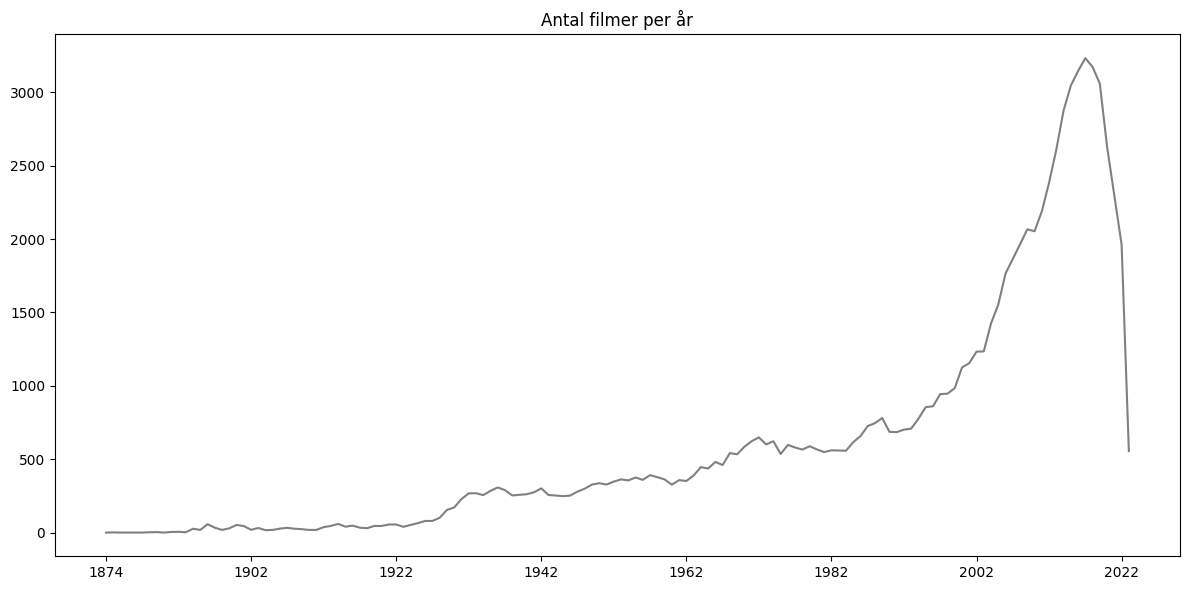

In [85]:

movies_df["year"] = movies_df["title"].str.extract(r"\((\d{4})\)") #GPT hjälp att få ut årtal 

movies_per_year = movies_df.groupby("year").size()

plt.figure(figsize=(12, 6)) # Figsize för bättre visualisering
movies_per_year.plot(kind="line", color="grey", linewidth=1.5)
plt.title("Antal filmer per år")
plt.xlabel("") # x-label som tom annars får jag ut groupby namnet
plt.tight_layout()
plt.show()


---

 ## e) Gör en plot över antalet ratings mot movieId

Jag tolkade denna uppgift som att vi skulle beräkna ratings för att sedan visa den visuellt, men efter att prata med min klasskamrat så kunde man också tolka att man endast behövde skriva ut alla ratings i en scatter, lägger upp båda lösningarna här
 dock vad vi kan få fram ifrån datan så ger folk vanligtvis en mitten rating över att gå till dom extrema åt båda hållen.

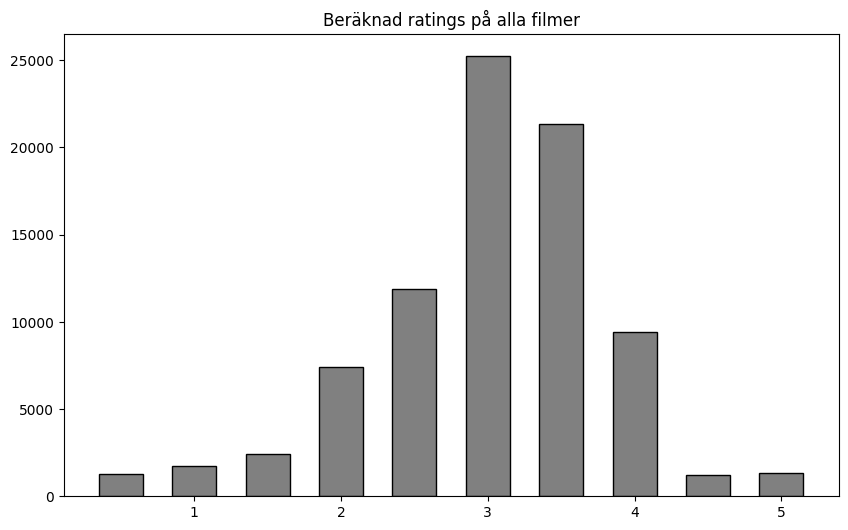

In [86]:
# Beräkna det genomsnittliga betyg för varje film.
average_ratings = ratings_df.groupby("movieId")["rating"].mean()

# Avrunda betyg till närmaste halva nummer.
rounded_ratings = (average_ratings * 2).round() / 2

# räkna på filmers rating, sortera därefter
ratings_counts = rounded_ratings.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(ratings_counts.index, ratings_counts.values, color="grey", edgecolor="black", width=0.3)
plt.title("Beräknad ratings på alla filmer")
plt.show()


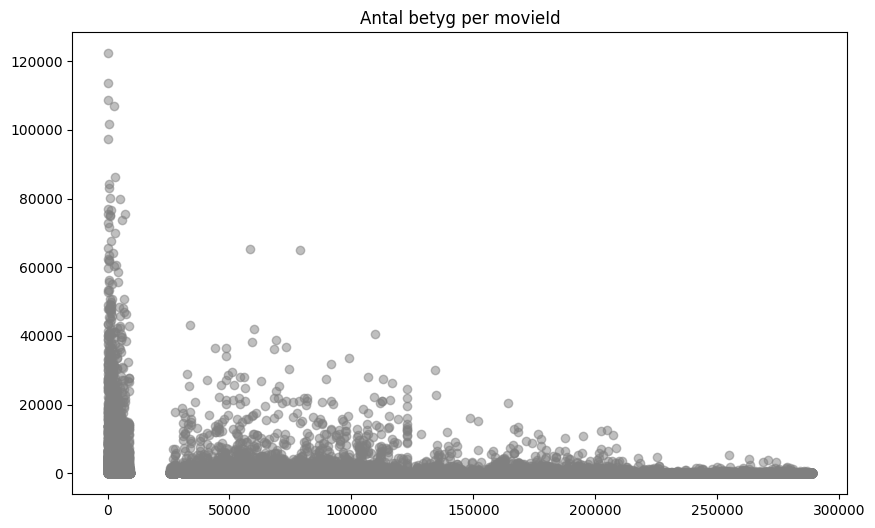

In [87]:
df_ratings = pd.read_csv(ratings_path)

ratings_per_movie = df_ratings['movieId'].value_counts()

plt.figure(figsize=(10, 6))
plt.scatter(ratings_per_movie.index, ratings_per_movie.values, color="grey", alpha=0.5)
plt.title("Antal betyg per movieId")
plt.show()


---

##  f) Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över dessa.

Stapeldiagram blev fullt och svårt att läsa la det som en piechart istället. (OBS gick lite utanför uppgiften eftersom C och F var så lika)

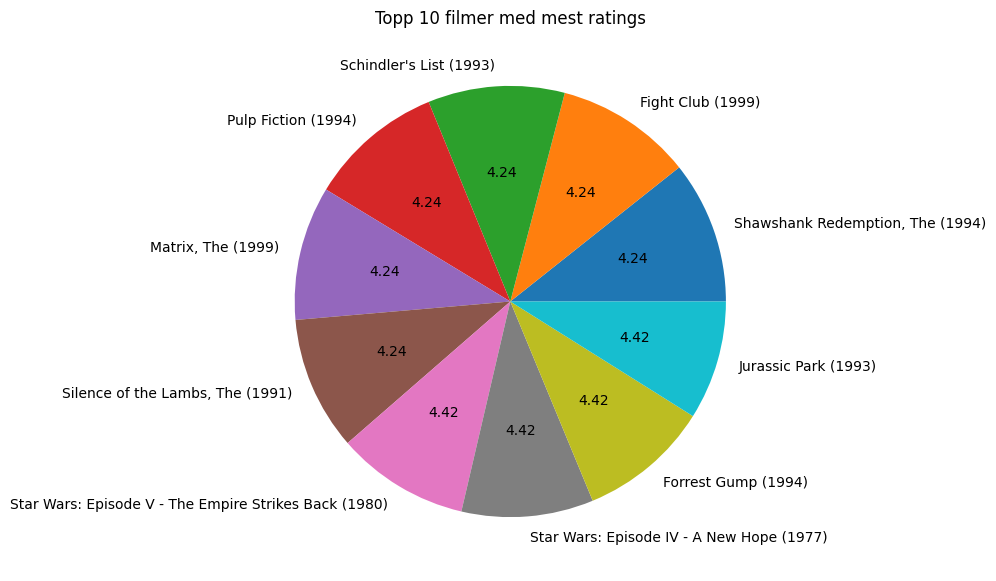

                                                title  avg rating
                     Shawshank Redemption, The (1994)        4.42
                                    Fight Club (1999)        4.24
                              Schindler's List (1993)        4.24
                                  Pulp Fiction (1994)        4.19
                                   Matrix, The (1999)        4.16
                     Silence of the Lambs, The (1991)        4.15
Star Wars: Episode V - The Empire Strikes Back (1980)        4.12
            Star Wars: Episode IV - A New Hope (1977)        4.09
                                  Forrest Gump (1994)        4.07
                                 Jurassic Park (1993)        3.69


In [88]:
avg_ratings = ["{:.2f}".format(rating) for rating in final_results_sorted["avg rating"].head(10)]

plt.figure(figsize=(14, 7))

# Vår beräkning för att få ut rätt average.
plt.pie(final_results_sorted["avg rating"].head(10), labels=final_results_sorted["title"].head(10),
        autopct=lambda pct: avg_ratings[int(pct/100*len(avg_ratings)) % len(avg_ratings)])

plt.title("Topp 10 filmer med mest ratings")
plt.show()
print(final_results_sorted[["title", "avg rating"]].to_string(index=False)) #Dubbelkollar datan



---
## 1.2 Skapa gles matris

Jag hade lite svårt att ge mig in i denna uppgift först men efter att bla kolla https://www.youtube.com/watch?v=Xn35Ac_fGrA och gått igenom kursmaterialet igen så fick jag en bredare förståelse, jag la in detta i GPT dock för att se om det fanns en lättare lösning än vad videon ovan visade och fick denna kod, jag ansåg att det var ett mycket effektivare sätt för lösningen så låter den vara för denna uppgift, lägger vikt i att jag förstår vad koden gör och lägger kommentarer därefter. 

In [89]:
from scipy.sparse import csc_matrix



user_categories = ratings_df['userId'].astype('category').cat
movie_categories = ratings_df['movieId'].astype('category').cat

sparse_matrix = csc_matrix((ratings_df['rating'], 
                            (user_categories.codes, 
                             movie_categories.codes)),
                            shape=(user_categories.categories.size, 
                            movie_categories.categories.size))

print(sparse_matrix)


  (0, 0)	4.0
  (1, 0)	5.0
  (6, 0)	4.0
  (9, 0)	3.0
  (11, 0)	5.0
  (13, 0)	2.5
  (20, 0)	3.0
  (23, 0)	4.5
  (31, 0)	3.5
  (34, 0)	4.0
  (41, 0)	4.0
  (43, 0)	3.5
  (50, 0)	5.0
  (52, 0)	3.5
  (53, 0)	4.0
  (56, 0)	3.5
  (63, 0)	5.0
  (67, 0)	3.5
  (71, 0)	4.0
  (78, 0)	4.5
  (81, 0)	5.0
  (86, 0)	0.5
  (87, 0)	5.0
  (93, 0)	4.0
  (94, 0)	3.0
  :	:
  (146344, 83217)	3.0
  (43102, 83218)	2.5
  (230764, 83219)	2.5
  (244080, 83220)	4.5
  (168266, 83221)	2.0
  (7643, 83222)	5.0
  (16019, 83222)	3.5
  (7643, 83223)	5.0
  (16019, 83223)	4.5
  (87763, 83224)	1.5
  (61019, 83225)	1.0
  (217562, 83225)	0.5
  (217562, 83226)	0.5
  (327438, 83227)	0.5
  (230022, 83228)	3.5
  (154482, 83229)	1.5
  (308173, 83230)	2.0
  (11968, 83231)	1.0
  (180877, 83232)	2.0
  (167320, 83233)	2.5
  (47790, 83234)	3.5
  (98407, 83235)	0.5
  (154482, 83236)	4.0
  (291388, 83237)	3.0
  (254113, 83238)	3.0


## 1.3 Recommender system

Med denna uppgift så kan vi starta med det logiska felet i "uppgift1_0" 

---
---

### 2.0 - EDA uppvärmning

OBS sätter inte in denna i gitignore eftersom den är under 1mb och underlättar för mig när jag jobbar över flera maskiner.

Använd pandas, matplotlib och seaborn för att besvara på följande frågor för datasetet:


---
  a) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

In [90]:
# startar med en utskrift av datan för att se vad vi har att jobba med 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "../../data/cardio_train.csv"
data = pd.read_csv(file_path, sep=';')  # Separator för lättare läsning av datan

print(data.head())



   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [91]:
# Räkna antalet positiva och negativa tagen från kaggle för att finna rätt data
count_cardio = data["cardio"].value_counts()


print(f"Positiva: {count_cardio[1]}")
print(f"Negativa: {count_cardio[0]}")


Positiva: 34979
Negativa: 35021


Undersökningen har nästan en 50/50 split i hjärt sjukdomar vs icke sjukdomar.

---
b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

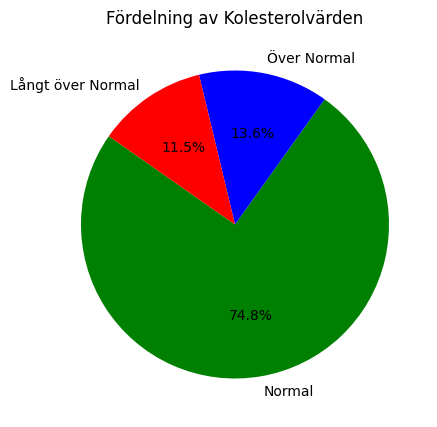

In [92]:
cholesterol_counts = data["cholesterol"].value_counts(normalize=True)  # normalize=true ger andelen istället för räkningen 

labels = ["Normal", "Över Normal", "Långt över Normal"]
colors = ["green","blue","red"]
plt.figure(figsize=(5, 5))
plt.pie(cholesterol_counts, labels=labels, colors=colors, autopct="%1.1f%%", startangle=145)
plt.title("Fördelning av Kolesterolvärden")
plt.show()


Vi kan dra slutsatsen att "långt över normal" och "över normal" är lika vanligt.

---
c) Hur ser åldersfördelningen ut? Rita ett histogram.

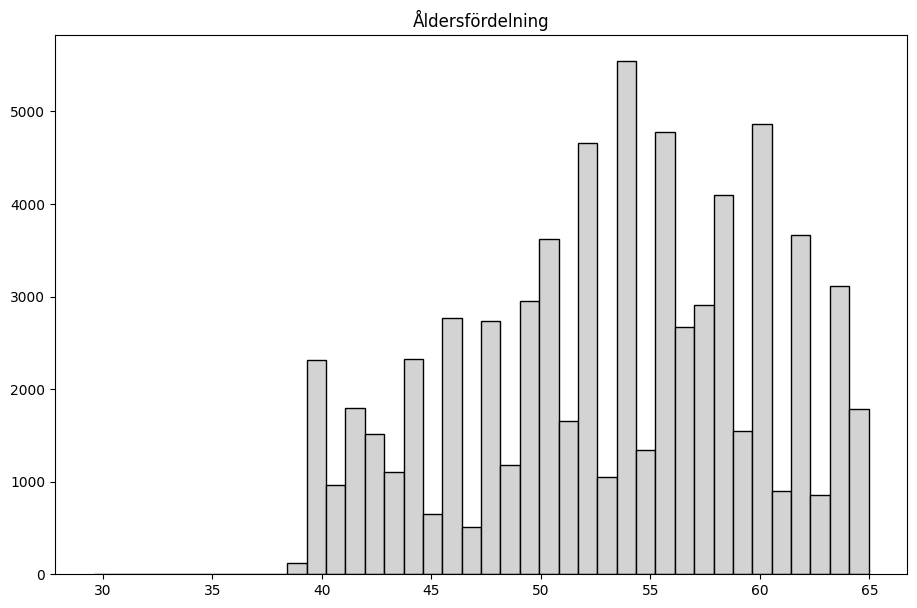

In [96]:
# dagar till år
data["age"] = data["age"] / 365

# Skapa ett histogram över åldern
plt.figure(figsize=(11, 7))

#bins för att få ut en mera strukturerad data(tack igen w3school)
plt.hist(data["age"], bins=40, color="lightgrey", edgecolor="black")
plt.title("Åldersfördelning")
plt.show()


Undersökningen har personer mellan åldern ~40 till 65 år.

---
 d) Hur stor andel röker?


In [94]:
rökare = data["smoke"].sum()  
total = len(data)

rökare_procent = (rökare / total) * 100

# avrundar till 2 decimaler
print(f"Personer som röker i %: {rökare_procent:.2f}%")


Personer som röker i %: 8.81%


Lågt antal rökare inom undersökningen.

---
 e) Hur ser viktfördelningen ut? Rita lämpligt diagram

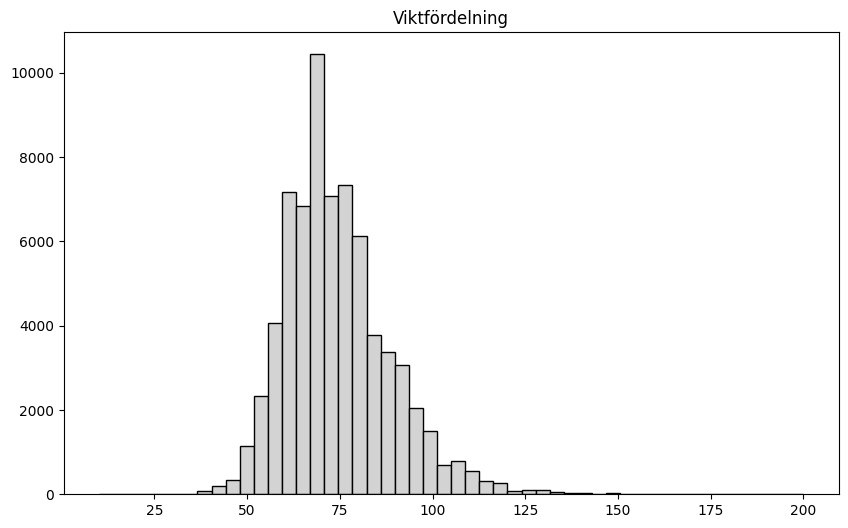

In [105]:
plt.figure(figsize=(10, 6))
plt.hist(data["weight"], bins=50, color="lightgrey", edgecolor="black")
plt.title("Viktfördelning")
plt.show()


Dom mesta inom undersökningen väger ~65 kg.

---

f) Hur ser längdfördelningen ut? Rita lämpligt diagram.

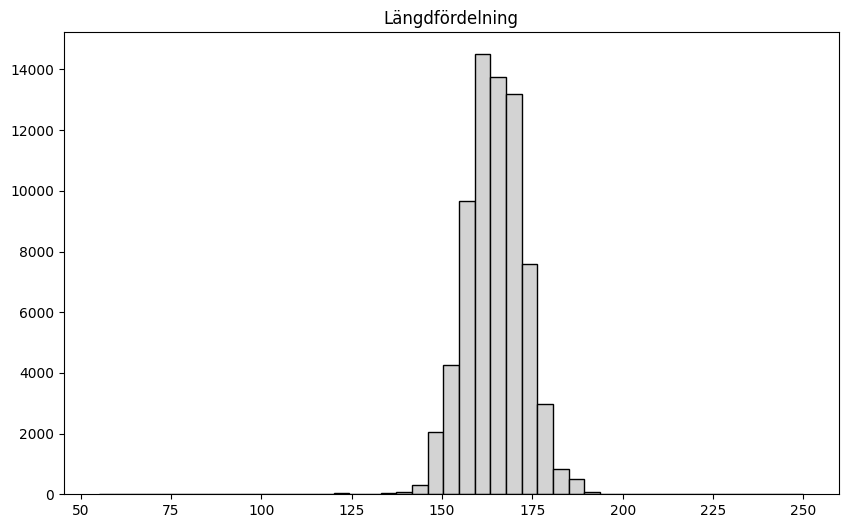

In [119]:
plt.figure(figsize=(10, 6))
plt.hist(data["height"], bins=45, color="lightgrey", edgecolor="black")
plt.title("Längdfördelning")
plt.show()


Dom mesta inom undersökningen är  ~165 cm långa.

---
  g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram.

  Med tanke på att datan inte klarifierar vad som är män eller kvinnor inom datan så kommer jag göra en gissning på vad som är vad här.

In [120]:
# kollar över datan, som inte klarifierar vilket kön tillhör vad.
print(data["gender"].value_counts())


gender
1    45530
2    24470
Name: count, dtype: int64


C:\Users\lager\AppData\Local\Temp\ipykernel_13692\1750543401.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=perc_w_disease.index, y=perc_w_disease.values, palette="coolwarm")


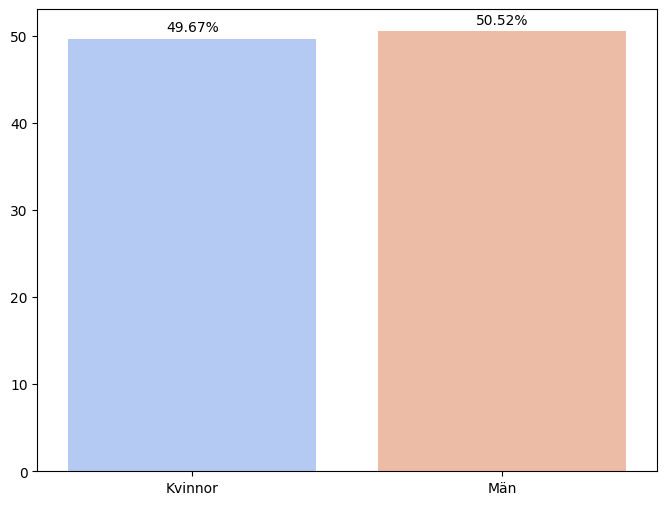

In [143]:
total = data["gender"].value_counts()

cardio_disease_true = data[data["cardio"] == 1]
gender_w_disease = cardio_disease_true["gender"].value_counts()

perc_w_disease = (gender_w_disease / total) * 100

plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=perc_w_disease.index, y=perc_w_disease.values, palette="coolwarm")
plt.xticks([0, 1], ["Kvinnor", "Män"])
plt.xlabel("")

# Lat GPT lösning för % över bars för att visualisera datan lättare.
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), ".2f") + "%",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha="center", va="center",
                     size=10, xytext=(0, 8),
                     textcoords="offset points")

plt.show()


In [138]:
# Ville dubbelkolla datan OBS snabb GPT lösning med en personlig touch.
total_gender_counts = data['gender'].value_counts()

gender_counts_with_disease = data[data['cardio'] == 1]['gender'].value_counts()

# Beräkna procentandelen av varje kön med hjärt-kärlsjukdom
percentage_with_disease = (gender_counts_with_disease / total_gender_counts) * 100

# Skriv ut totala antalet och procentandelen
for gender, count in total_gender_counts.items():
    gender_str = 'Kvinnor' if gender == 1 else 'Män'
    print(f"Totalt antal {gender_str}: {count}")
    print(f"Antal {gender_str} med hjärt-kärlsjukdom: {gender_counts_with_disease[gender]}")
    print(f"Andel {gender_str} med hjärt-kärlsjukdom: {percentage_with_disease[gender]:.2f}%\n")


Totalt antal Kvinnor: 45530
Antal Kvinnor med hjärt-kärlsjukdom: 22616
Andel Kvinnor med hjärt-kärlsjukdom: 49.67%

Totalt antal Män: 24470
Antal Män med hjärt-kärlsjukdom: 12363
Andel Män med hjärt-kärlsjukdom: 50.52%



Vi kan notera att det är mer kvinnor(om 1 i detta fall är kvinnor) som har hjärt sjukdomar men att andelen inom varje är nästan en 50/50 split.

---
# 2.1.0 - Feature engineering BMI
Skapa en feature för BMI (Body Mass Index), läs på om formeln på wikipedia.


  a) Släng de samples med orimliga BMIer och outliers. Notera att detta kan vara svårt att avgöra i vilket
range av BMIer som vi ska spara. Beskriv hur du kommer fram till gränserna.